In [719]:
""" 
SOMMAIRE.

- recupérer les données à partir de la base de données sql : top_gun_data_1.db
- decliner les données par tables : aeronefs, composants, degradations et vols.
- renommer certaines colonnes pour faciliter les jointures au besoin.
- recuprer la date de mise en service de chaque avion et l'intégrer à la table des vols.
- calculer les heures de vols cumulées et les stocker des la colonne 'cumulative_hours'
- afficher les hsitogrammes des variables numriques de la table
- affichier la matrice de corrélation des variables numériques.
- recuprer la base de données pivotées realisée par Guillaume L.

"""

" \nSOMMAIRE.\n\n- recupérer les données à partir de la base de données sql : top_gun_data_1.db\n- decliner les données par tables : aeronefs, composants, degradations et vols.\n- renommer certaines colonnes pour faciliter les jointures au besoin.\n- recuprer la date de mise en service de chaque avion et l'intégrer à la table des vols.\n- calculer les heures de vols cumulées et les stocker des la colonne 'cumulative_hours'\n- afficher les hsitogrammes des variables numriques de la table\n- affichier la matrice de corrélation des variables numériques.\n- recuprer la base de données pivotées realisée par Guillaume L.\n\n"

In [720]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sqlite3
from datetime import date
from sklearn.model_selection import GridSearchCV

In [721]:
conn = sqlite3.connect('/Users/um/Desktop/Wild/Top_gun/Datasets/top_gun_data_1.db')

In [722]:
df_aeronefs = pd.read_sql_query('select * from aeronefs', conn)
df_composants = pd.read_sql_query('select * from composants', conn)
df_degradations = pd.read_sql_query('select * from degradations', conn)
df_logs_vols = pd.read_sql_query('select * from logs_vols', conn)

In [723]:
df_pivot = pd.read_csv('/Users/um/Desktop/Wild/Top_gun/Datasets/pivot_df.csv')

In [724]:
df_pivot.drop(columns=['Unnamed: 0'], inplace=True)

In [725]:
df_pivot

,aero,etat_voyant,categorie_0,categorie_1,categorie_10,categorie_11,categorie_12,categorie_13,categorie_14,categorie_15,...,usure_40,usure_41,usure_42,usure_43,usure_44,usure_5,usure_6,usure_7,usure_8,usure_9
0,A320_1884,2,2,2,2,2,2,2,2,1,...,36.0,39.0,96.0,29.0,51.0,27.0,47.0,33.0,39.0,20.0
1,A320_1930,1,2,2,2,2,2,2,2,1,...,49.0,79.0,41.0,24.0,54.0,59.0,25.0,24.0,31.0,29.0
2,A320_2237,1,2,2,2,2,2,2,2,1,...,66.0,43.0,72.0,62.0,52.0,67.0,53.0,16.0,27.0,61.0
3,A320_2497,0,2,2,2,2,2,2,2,1,...,33.0,24.0,6.0,50.0,33.0,35.0,26.0,63.0,59.0,34.0
4,A320_2562,1,2,2,2,2,2,2,2,1,...,27.0,76.0,7.0,35.0,29.0,44.0,22.0,66.0,43.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,E175_4558,0,2,2,2,2,2,2,2,1,...,45.0,67.0,87.0,44.0,53.0,56.0,72.0,57.0,36.0,21.0
226,E175_5414,0,2,2,2,2,2,2,2,1,...,35.0,52.0,50.0,22.0,75.0,65.0,31.0,63.0,51.0,35.0
227,E175_5586,0,2,2,2,2,2,2,2,1,...,27.0,15.0,33.0,44.0,43.0,72.0,17.0,22.0,18.0,63.0
228,E175_6729,0,2,2,2,2,2,2,2,1,...,38.0,60.0,33.0,29.0,55.0,59.0,39.0,56.0,49.0,49.0


In [726]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 92 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aero          230 non-null    object 
 1   etat_voyant   230 non-null    int64  
 2   categorie_0   230 non-null    int64  
 3   categorie_1   230 non-null    int64  
 4   categorie_10  230 non-null    int64  
 5   categorie_11  230 non-null    int64  
 6   categorie_12  230 non-null    int64  
 7   categorie_13  230 non-null    int64  
 8   categorie_14  230 non-null    int64  
 9   categorie_15  230 non-null    int64  
 10  categorie_16  230 non-null    int64  
 11  categorie_17  230 non-null    int64  
 12  categorie_18  230 non-null    int64  
 13  categorie_19  230 non-null    int64  
 14  categorie_2   230 non-null    int64  
 15  categorie_20  230 non-null    int64  
 16  categorie_21  230 non-null    int64  
 17  categorie_22  230 non-null    int64  
 18  categorie_23  230 non-null    

In [727]:
df_logs_vols.head(5)

,ref_vol,aero_linked,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
1,V02564879,B747_3165,2024-06-02,5.1,0,0.9,950.6,4.558
2,V07933973,B757_2518,2024-06-02,7.7,3,-6.2,975.5,4.587
3,V02230187,A340_1047,2024-06-02,6.1,1,-25.3,945.1,3.288
4,V09071213,B757_6806,2024-06-02,4.5,0,11.1,931.3,2.817


In [728]:
df_logs_vols.rename(
    columns = {
        'aero_linked': 'aero'
    },
    inplace=True
)

In [729]:
df_logs_vols.head(5)

,ref_vol,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
1,V02564879,B747_3165,2024-06-02,5.1,0,0.9,950.6,4.558
2,V07933973,B757_2518,2024-06-02,7.7,3,-6.2,975.5,4.587
3,V02230187,A340_1047,2024-06-02,6.1,1,-25.3,945.1,3.288
4,V09071213,B757_6806,2024-06-02,4.5,0,11.1,931.3,2.817


In [730]:
df_logs_vols[df_logs_vols['aero'] == 'B767_4924']

,ref_vol,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
126,V02682834,B767_4924,2024-06-03,3.9,0,-0.2,1032.1,1.729
395,V08375145,B767_4924,2024-06-05,7.3,0,-3.5,1023.0,0.450
846,V00790410,B767_4924,2024-06-10,4.1,0,5.2,877.6,2.996
1072,V04434956,B767_4924,2024-06-12,5.5,0,13.4,1025.9,3.029
1340,V05696480,B767_4924,2024-06-16,3.5,0,-9.8,1010.1,1.460
1540,V07812472,B767_4924,2024-06-18,1.7,0,17.4,936.2,0.984
1803,V07441447,B767_4924,2024-06-20,7.3,0,-7.4,959.6,2.136
1926,V05119232,B767_4924,2024-06-22,8.0,0,15.7,944.9,0.155
2051,V02314681,B767_4924,2024-06-23,1.9,1,30.6,968.1,3.341


In [731]:
"""
Je recupère les valeurs extrêmes subies par chaque aeronefs pendants les vols.
Je recupere les heures de vols cumulées pour chaque vols.
Je les insère dans la table df_pivot

"""

time_min = {}
time_max = {}
temp_min = {}
temp_max = {}
pressure_min = {}
pressure_max = {}
vibrations_min = {}
vibrations_max = {}

for aero in df_logs_vols['aero'].unique():
    df_aero = df_logs_vols[df_logs_vols['aero'] == aero]
    time_min[aero] = df_aero['time_en_air'].min()
    time_max[aero] = df_aero['time_en_air'].max()
    temp_min[aero] = df_aero['temp en °C'].min()
    temp_max[aero] = df_aero['temp en °C'].max()
    pressure_min[aero] = df_aero['pressure en hPa'].min()
    pressure_max[aero] = df_aero['pressure en hPa'].max()
    vibrations_min[aero] = df_aero['vibrations en m/s²'].min()
    vibrations_max[aero] = df_aero['vibrations en m/s²'].max()

In [732]:
time_cumul = {}
for aero in df_logs_vols['aero'].unique():
    df_aero = df_logs_vols[df_logs_vols['aero'] == aero]
    time_cumul[aero] = df_aero['time_en_air'].sum()

In [733]:
df_pivot['time_en_air_min']= df_pivot['aero'].map(time_min)
df_pivot['time_en_air_max']= df_pivot['aero'].map(time_max)
df_pivot['temp_en_°C_min']= df_pivot['aero'].map(temp_min)
df_pivot['temp_en_°C_max']= df_pivot['aero'].map(temp_max)
df_pivot['pressure_en_hPa_min']= df_pivot['aero'].map(pressure_min)
df_pivot['pressure_en_hPa_max']= df_pivot['aero'].map(pressure_max)
df_pivot['vibrations_en_m/s²_min']= df_pivot['aero'].map(vibrations_min)
df_pivot['vibrations_en_m/s²_max']= df_pivot['aero'].map(vibrations_max)
df_pivot['time_en_air_cumul'] = df_pivot['aero'].map(time_cumul)

In [734]:
df_pivot

,aero,etat_voyant,categorie_0,categorie_1,categorie_10,categorie_11,categorie_12,categorie_13,categorie_14,categorie_15,...,usure_9,time_en_air_min,time_en_air_max,temp_en_°C_min,temp_en_°C_max,pressure_en_hPa_min,pressure_en_hPa_max,vibrations_en_m/s²_min,vibrations_en_m/s²_max,time_en_air_cumul
0,A320_1884,2,2,2,2,2,2,2,2,1,...,20.0,0.6,10.1,-24.3,18.3,872.1,1090.2,0.161,4.748,107.5
1,A320_1930,1,2,2,2,2,2,2,2,1,...,29.0,1.4,10.4,-18.7,19.3,861.0,1070.8,0.126,4.836,140.2
2,A320_2237,1,2,2,2,2,2,2,2,1,...,61.0,0.6,7.7,-24.7,22.0,871.6,1051.7,0.401,4.885,85.0
3,A320_2497,0,2,2,2,2,2,2,2,1,...,34.0,0.6,10.1,-16.8,17.6,855.2,1035.4,0.124,4.798,92.8
4,A320_2562,1,2,2,2,2,2,2,2,1,...,70.0,0.6,7.9,-25.2,16.4,887.2,1071.7,0.003,4.936,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,E175_4558,0,2,2,2,2,2,2,2,1,...,21.0,0.6,8.7,-13.1,20.8,852.1,1062.1,0.113,4.968,123.9
226,E175_5414,0,2,2,2,2,2,2,2,1,...,35.0,1.0,10.8,-15.6,16.7,864.3,1055.2,0.383,4.984,140.8
227,E175_5586,0,2,2,2,2,2,2,2,1,...,63.0,0.6,7.7,-11.9,22.0,839.9,1062.7,0.074,4.959,112.1
228,E175_6729,0,2,2,2,2,2,2,2,1,...,49.0,1.5,9.7,-24.3,18.6,884.2,1008.8,0.069,4.939,134.5


In [767]:
df_pivot.etat_voyant.value_counts()

etat_voyant
0    156
1     50
2     23
3      1
Name: count, dtype: int64

In [735]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Columns: 101 entries, aero to time_en_air_cumul
dtypes: float64(54), int64(46), object(1)
memory usage: 181.6+ KB


In [736]:
"""
plt.figure(figsize=(30,20))

mumeric_columns = df_pivot.select_dtypes(include=['number']).columns
matrix = df_pivot[mumeric_columns].corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, cmap='coolwarm', mask = mask)
plt.title('Matrice de corrélation des variables numériques de la table df_log_vol actualisée')
plt.show() 

"""

"\nplt.figure(figsize=(30,20))\n\nmumeric_columns = df_pivot.select_dtypes(include=['number']).columns\nmatrix = df_pivot[mumeric_columns].corr()\nmask = np.triu(np.ones_like(matrix, dtype=bool))\nsns.heatmap(matrix, annot=True, cmap='coolwarm', mask = mask)\nplt.title('Matrice de corrélation des variables numériques de la table df_log_vol actualisée')\nplt.show() \n\n"

# ML logistic regression classique.

In [737]:
X = df_pivot.drop(columns =['etat_voyant'])
y = df_pivot['etat_voyant']

In [738]:
""" 
preparation du jeu de données pour le pipeline, separation des variables en fonction de leurs catégories.
On encode les variables catégorielles avec OneHotEncoder, les variables numériques avec StandardScaler.
"""
numerics = X.select_dtypes(include = ['number']).columns
categoricals = X.select_dtypes(include = ['object']).columns

In [739]:
""" 
separation du jeu de données en jeu d'entrainement et de test

"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [740]:
""" encodage et standardisation des données """

preprocessor = ColumnTransformer(
    transformers = [ 
        ('num', StandardScaler(), numerics),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricals)
                    ]
)

pipeline_lr = Pipeline(steps =[
        ('preprocessor', preprocessor),
         ('classifier', LogisticRegression())
         
])

In [741]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['categorie_0', 'categorie_1', 'categorie_10', 'categorie_11',
       'categorie_12', 'categorie_13', 'categorie_14', 'categorie_15',
       'categorie_16', 'categorie_17', 'categorie_18', 'categorie_19',
       'categorie_2', 'categorie_20', 'categorie_21', 'categorie_22',
       'categorie_23', 'ca...
       'usure_6', 'usure_7', 'usure_8', 'usure_9', 'time_en_air_min',
       'time_en_air_max', 'temp_en_°C_min', 'temp_en_°C_max',
       'pressure_en_hPa_min', 'pressure_en_hPa_max', 'vibrations_en_m/s²_min',
       'vibrations_en_m/s²_max', 'time_en_air_cumul'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['aero'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [742]:
y_pred = pipeline_lr.predict(X_test)

# scores

In [743]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        33
           1       0.20      0.33      0.25         6
           2       1.00      0.33      0.50         6
           3       0.00      0.00      0.00         1

    accuracy                           0.63        46
   macro avg       0.48      0.36      0.37        46
weighted avg       0.68      0.63      0.63        46



/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


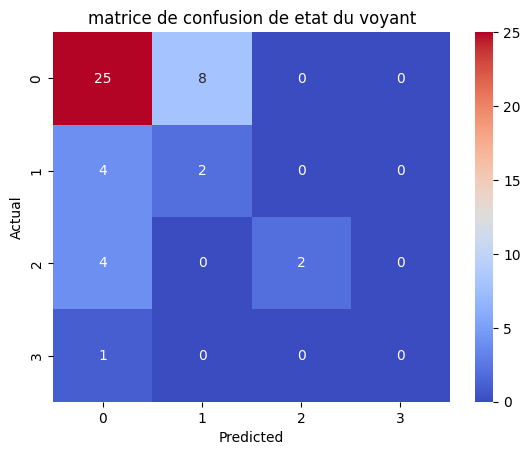

In [744]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('matrice de confusion de etat du voyant')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [745]:
"""
OPTIMISATION DU MODELE DE MACHINE LEARNING


On utilise le SVC pour trouver les meilleurs paramètres pour le machine learning.
Random search : faire varier score auc, recall
classes déséquilibrées :  technques d'échantillonnage : smote (/! uniquement le jeu de données d'entrainement)
faire vairer les hyperparamètres de la random forest pour liliter l'overfitting

"""

"\nOPTIMISATION DU MODELE DE MACHINE LEARNING\n\n\nOn utilise le SVC pour trouver les meilleurs paramètres pour le machine learning.\nRandom search : faire varier score auc, recall\nclasses déséquilibrées :  technques d'échantillonnage : smote (/! uniquement le jeu de données d'entrainement)\nfaire vairer les hyperparamètres de la random forest pour liliter l'overfitting\n\n"

In [746]:
"""
TECHNIQUES D' ECHANTILLONNAGE 
modification du poids des classes pour le machine learning

"""

from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Regression logistique, compute_class_weight

In [747]:
""" 
les classes sont les index et les poids sont le occurrences de chaque index 

"""

classes = list(df_pivot['etat_voyant'].value_counts().index)
occurrences = list(df_pivot['etat_voyant'].value_counts().values)
poids_classes = compute_class_weight(class_weight='balanced', classes=np.array(classes), y=np.array([0]*156 + [1]*50 + [2]*23 + [3]*1))
poids_classes_dict = dict(zip(classes, poids_classes))
print(classes)
print(occurrences)
print(poids_classes_dict)

[0, 1, 2, 3]
[156, 50, 23, 1]
{0: 0.3685897435897436, 1: 1.15, 2: 2.5, 3: 57.5}


In [748]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerics),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricals)
    ]
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(class_weight=poids_classes_dict))
    ]
)


In [749]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [750]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        33
           1       0.19      0.50      0.27         6
           2       1.00      0.50      0.67         6
           3       0.00      0.00      0.00         1

    accuracy                           0.59        46
   macro avg       0.49      0.41      0.41        46
weighted avg       0.71      0.59      0.62        46



/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


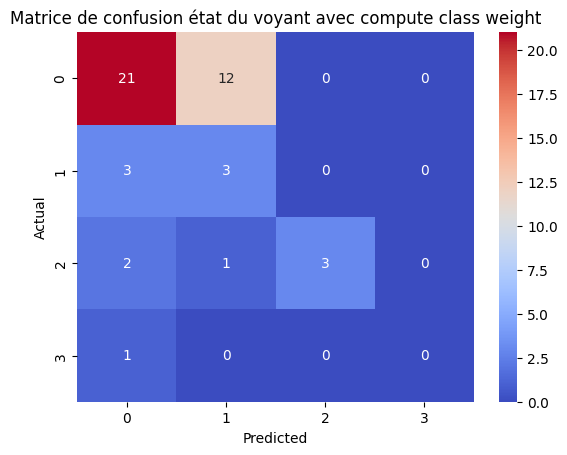

In [751]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Matrice de confusion état du voyant avec compute class weight')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Regression logistique, compute_class_weight, Smote

In [752]:
"""
SMOTE (pour Synthetic Minority Over-sampling Technique).
SMOTE est une méthode de sur-échantillonnage.
Elle fonctionne en créant des échantillons synthétiques à partir de la classe minoritaire au lieu de créer de simples copies.

"""

'\nSMOTE (pour Synthetic Minority Over-sampling Technique).\nSMOTE est une méthode de sur-échantillonnage.\nElle fonctionne en créant des échantillons synthétiques à partir de la classe minoritaire au lieu de créer de simples copies.\n\n'

In [753]:
smote = SMOTE(sampling_strategy='auto')

In [754]:
pipeline_lr = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('classifier', LogisticRegression(class_weight=poids_classes_dict))
    ]
)

In [755]:
pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)

In [756]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        33
           1       0.17      0.50      0.25         6
           2       1.00      0.50      0.67         6
           3       0.00      0.00      0.00         1

    accuracy                           0.54        46
   macro avg       0.48      0.39      0.39        46
weighted avg       0.70      0.54      0.59        46



/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


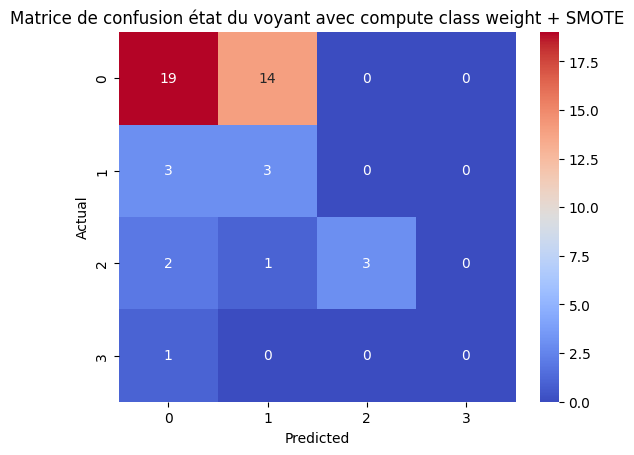

In [757]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Matrice de confusion état du voyant avec compute class weight + SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()